In [1]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Dataset Analysis

## Numerical and Graphical Descriptive analysis


In [2]:
dataset_file = "datasets/data-v1.csv"

df = pd.read_csv(dataset_file, sep=",")
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.380795,0.124698,1883.001208,1865.303842,3878.803772,0.101184,-162.754063,121.255273,-29.199931,54.109434,...,-7.320438,3.900521,-2.205811,-2.243190,1.619559,-5.134632,3.043665,-6.634297,5.002622,-7.852236
std,0.082699,0.062342,522.242739,339.144108,1096.400581,0.039370,95.151859,23.111192,20.168244,16.110998,...,5.512331,5.395750,4.365042,3.977097,3.694564,3.984223,4.333503,4.096735,4.316616,4.287511
min,0.171805,0.005014,549.065530,796.514455,710.220705,0.021877,-556.024780,42.361320,-99.755829,-3.247742,...,-32.414146,-14.018186,-20.763159,-16.360909,-12.323302,-19.637094,-12.697938,-18.963448,-13.177314,-22.937521
25%,0.321059,0.082679,1461.113254,1643.098517,3034.883732,0.071043,-213.648769,104.958897,-42.612360,45.396466,...,-11.082822,0.603397,-5.172873,-4.874094,-0.737182,-7.606263,0.300295,-9.524103,2.242899,-10.705755
50%,0.385390,0.116670,1926.222388,1943.105990,4064.821254,0.097405,-138.674522,118.840340,-30.713336,54.597818,...,-7.538498,4.457320,-2.305679,-2.279468,1.757869,-5.469918,3.286095,-6.899161,5.105744,-8.184787
75%,0.439446,0.167502,2277.180673,2110.350537,4748.075456,0.128231,-95.242519,135.433762,-17.951447,64.680765,...,-3.929274,7.729157,0.444397,0.385467,4.065663,-2.710800,5.842021,-4.012571,8.109790,-5.197460
max,0.667248,0.378549,3369.517356,2611.325445,6268.003765,0.257681,15.127309,197.522858,55.721581,98.046173,...,11.871216,17.391365,13.880814,10.114944,17.297344,9.187266,22.280184,11.137421,22.338120,10.675509


The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

## Feature Correlation

The features of this dataset being continuous but with different scales we will use Pearson's correlation.

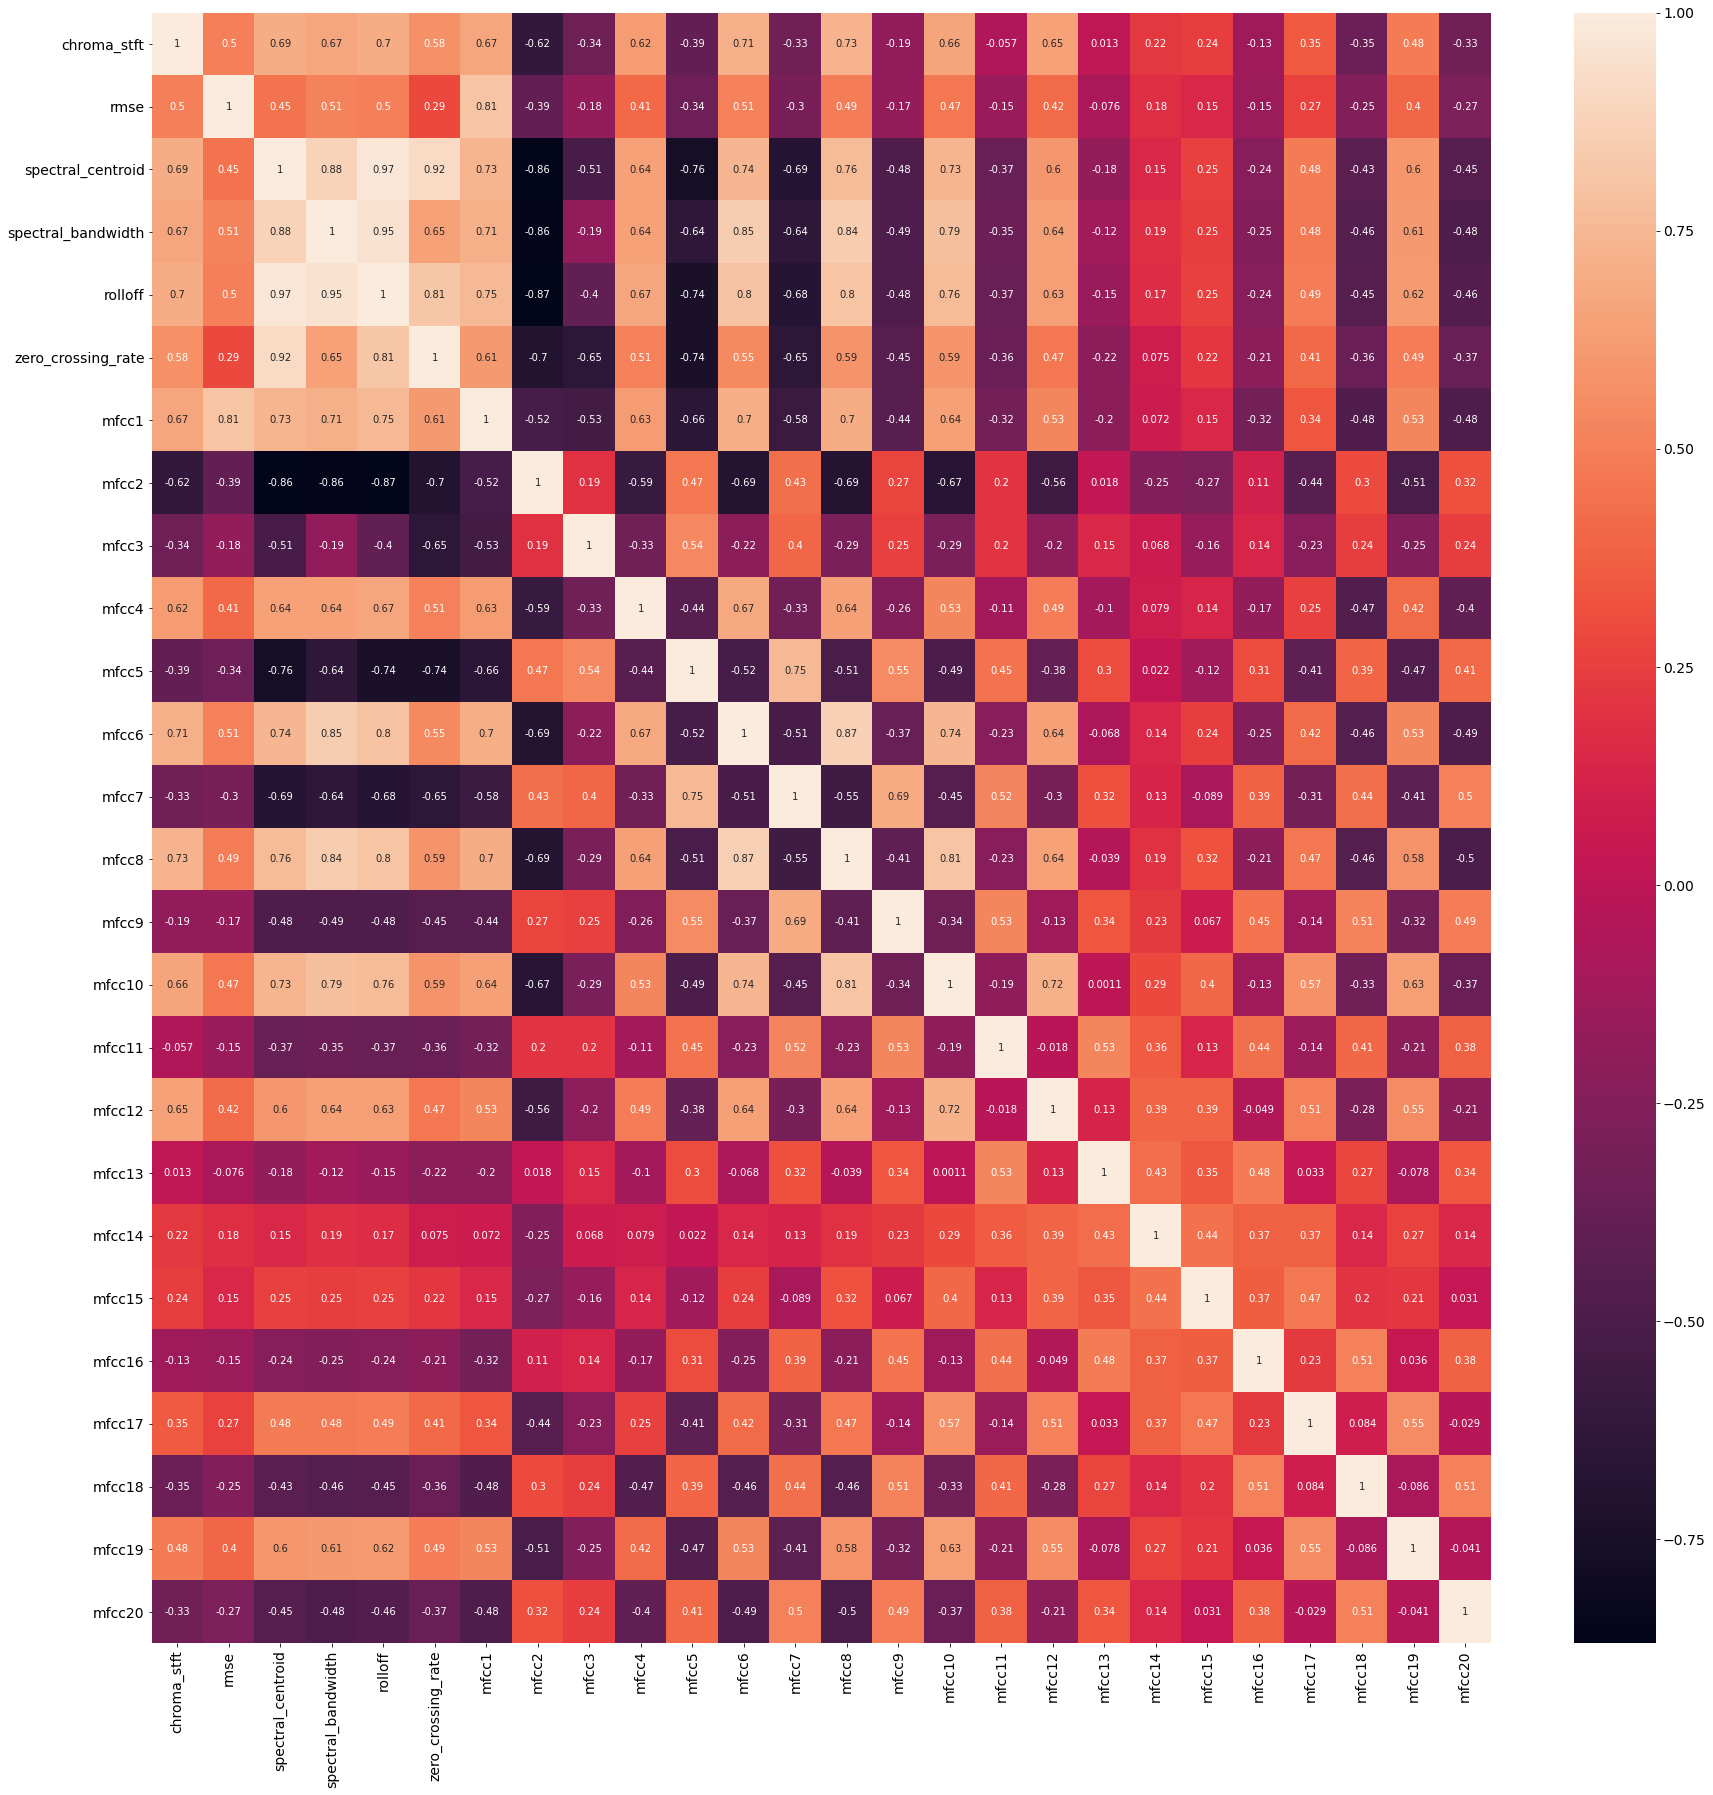

In [3]:
corrMatrix = df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(30,30))   
ax = sb.heatmap(corrMatrix, annot=True)
plt.show()

## Group Clustering and visualisation

In [6]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because kmean uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

Using kmeans to seperate data into n clusters determined by silhouette score without using genre labels.

In [7]:
from sklearn import cluster, metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA

def show_pca_and_clusters(X, y, title=""):
    scores = {}
    start_range = 5
    
    ######################################################################
    # 1 - Find best number of Kmean clusters by optimizing silhouette score
    ######################################################################
    for i in range(start_range,25):
        km = cluster.KMeans(i)
        km.fit(X)
        scores[i] = metrics.silhouette_score(X, km.labels_)

    optimal_cluster_nb = start_range
    max_score = scores[start_range]

    for cluster_nb, score in scores.items():
        if score > max_score:
            optimal_cluster_nb = cluster_nb
            max_score = score
    
    print(f"The best silhouette score here is : {max_score} and  represents {optimal_cluster_nb} clusters.")
    
    ######################################################################
    # 2 - Apply K-Means with best parammeters for visualizing clusters  
    ######################################################################
    km = cluster.KMeans(optimal_cluster_nb) # number of genres
    km.fit(X)
    
    
    ######################################################################
    # 3 - Appling PCA to dataset
    ######################################################################
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    
    ######################################################################
    # 4 - Scatter plot of dataset with regular labels and labels from kmean
    ######################################################################
    
    le = preprocessing.LabelEncoder()
    le.fit(y)

    y_encoded = le.transform(y)

    
    fig, ax = plt.subplots(2, figsize=(30,20))
    
    fig.suptitle(title, fontsize=30)
    scatter0 = ax[0].scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, s=30,cmap=plt.get_cmap("Paired"))
    # plotting data displaying n clusters found by kmean
    scatter1 = ax[1].scatter(X_pca[:,0], X_pca[:,1], c=km.labels_, s=30,cmap=plt.get_cmap("Set1"))


    # Produce a legend with the unique colors from the scatter
    legend0 = ax[0].legend(*scatter0.legend_elements(),
                        loc="lower left", title="Classes")

    # Produce a legend with the unique colors from the scatter
    legend1 = ax[1].legend(*scatter1.legend_elements(),
                        loc="lower left", title="Classes")

    # Convert legend text
    for i in range(len(legend0.get_texts())):
        legend0.get_texts()[i].set_text(str(le.inverse_transform([i])[0]))

    for i in range(len(legend1.get_texts())):
        legend1.get_texts()[i].set_text("Cluster #%s" % i)

    ax[0].add_artist(legend0)
    ax[0].set_title("Plot of the PCA with dataset classes")
    ax[1].add_artist(legend1)
    ax[1].set_title("Plot of the PCA with Kmean identified clusters")
    plt.show()
    

### Plotting dataset by using PCA

The best silhouette score here is : 0.12876499798615965 and  represents 5 clusters.


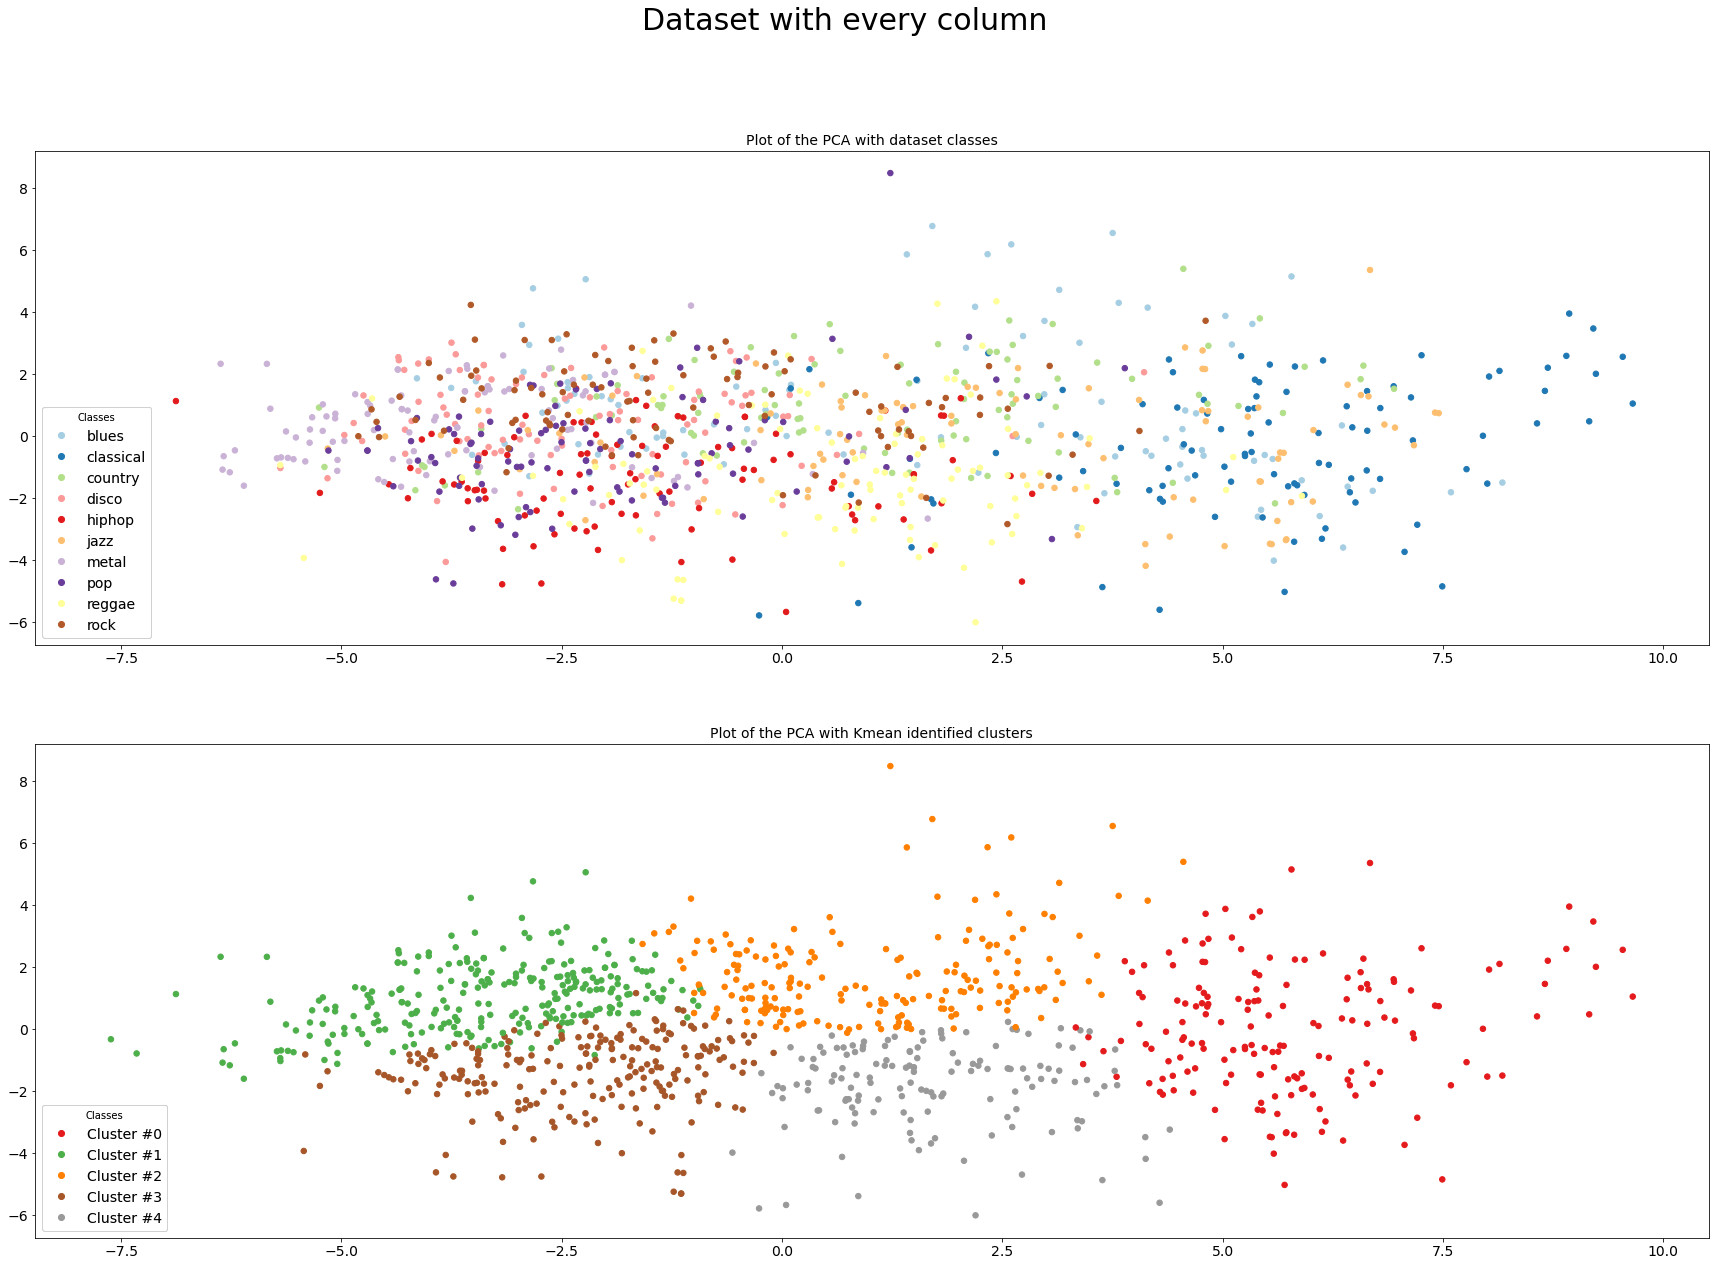

In [8]:
show_pca_and_clusters(X, y, "Dataset with every column")

The best silhouette score here is : 0.23016225664443055 and  represents 6 clusters.


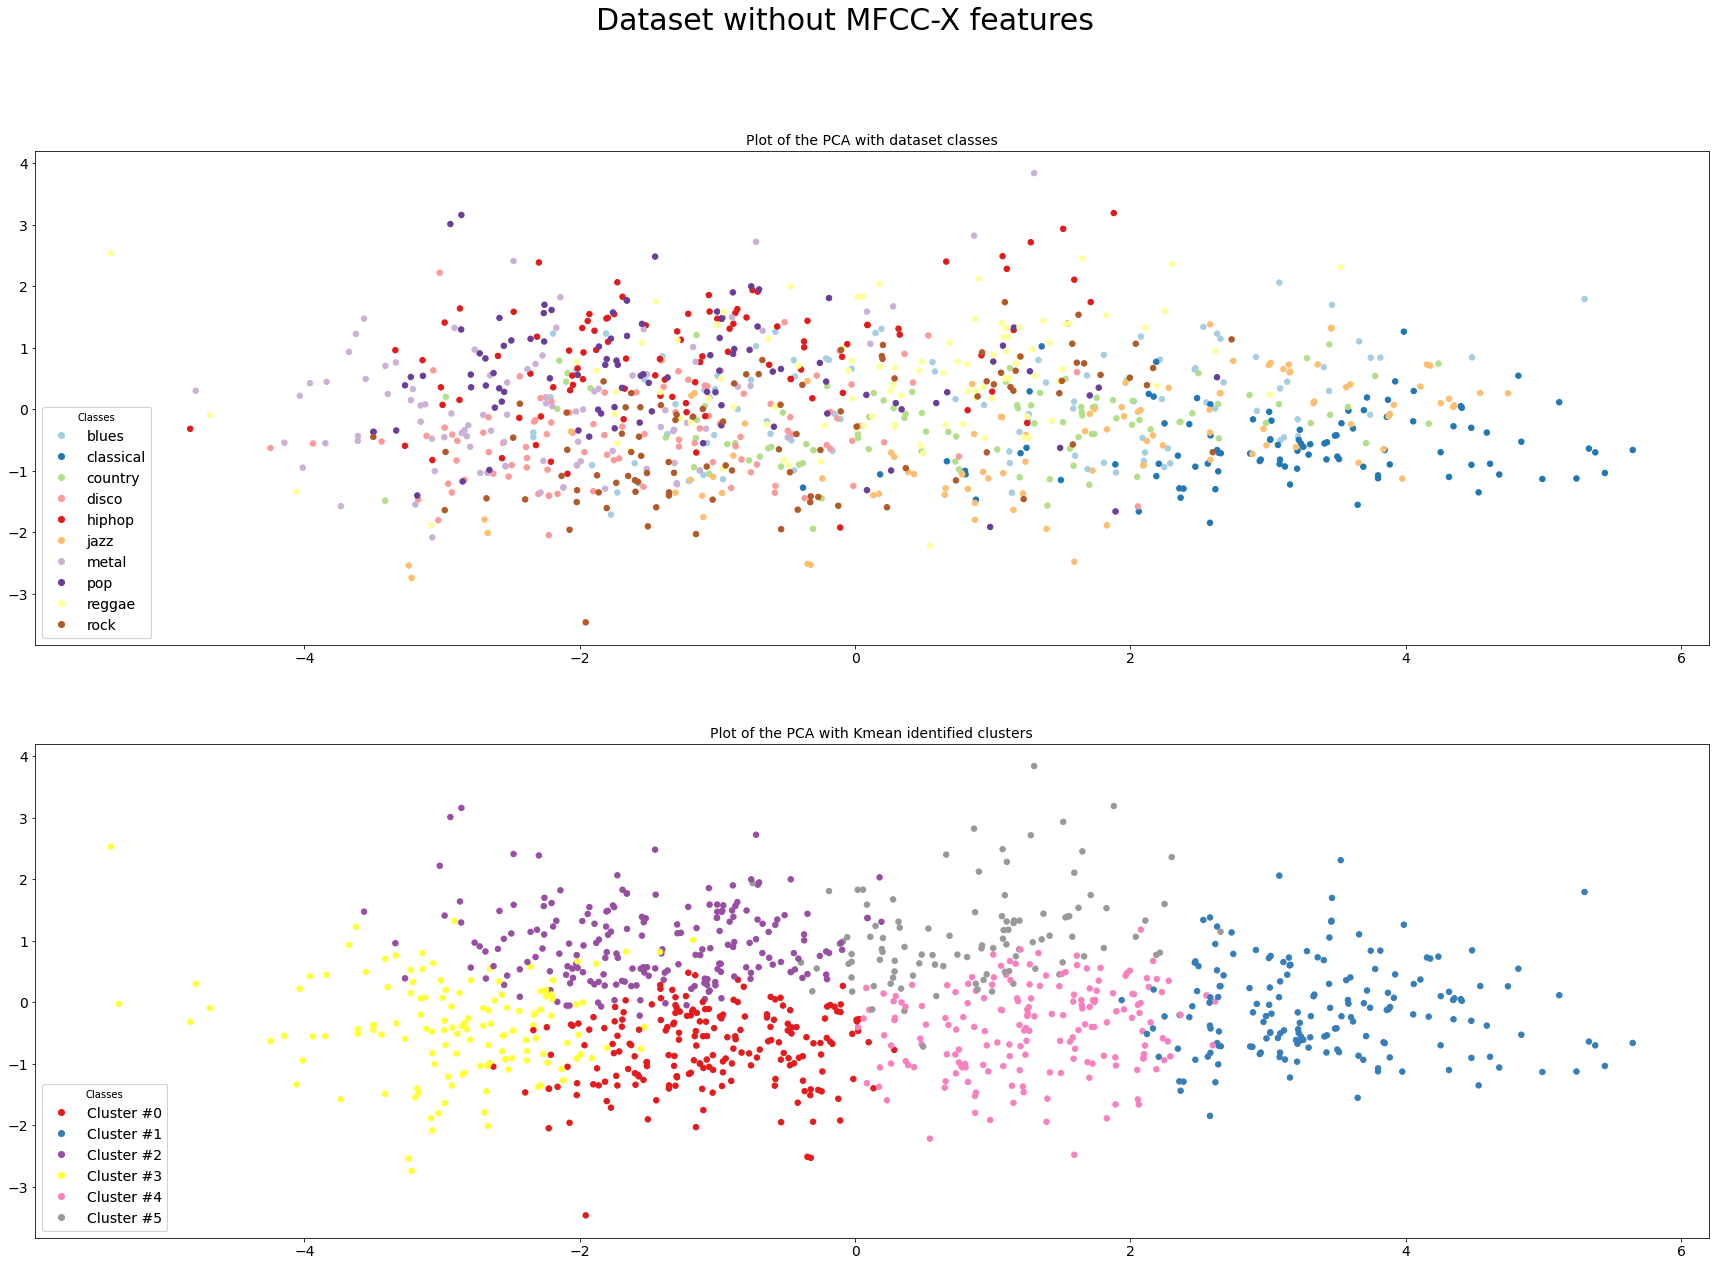

In [9]:
X_less_features = preprocessing.StandardScaler().fit_transform(df.drop(["label", "filename", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16", "mfcc17", "mfcc18", "mfcc19","mfcc20"], axis=1).values)


show_pca_and_clusters(X_less_features, y, "Dataset without MFCC-X features")



## Descriptive Summaries

### spectral_centroid

#### Histogram

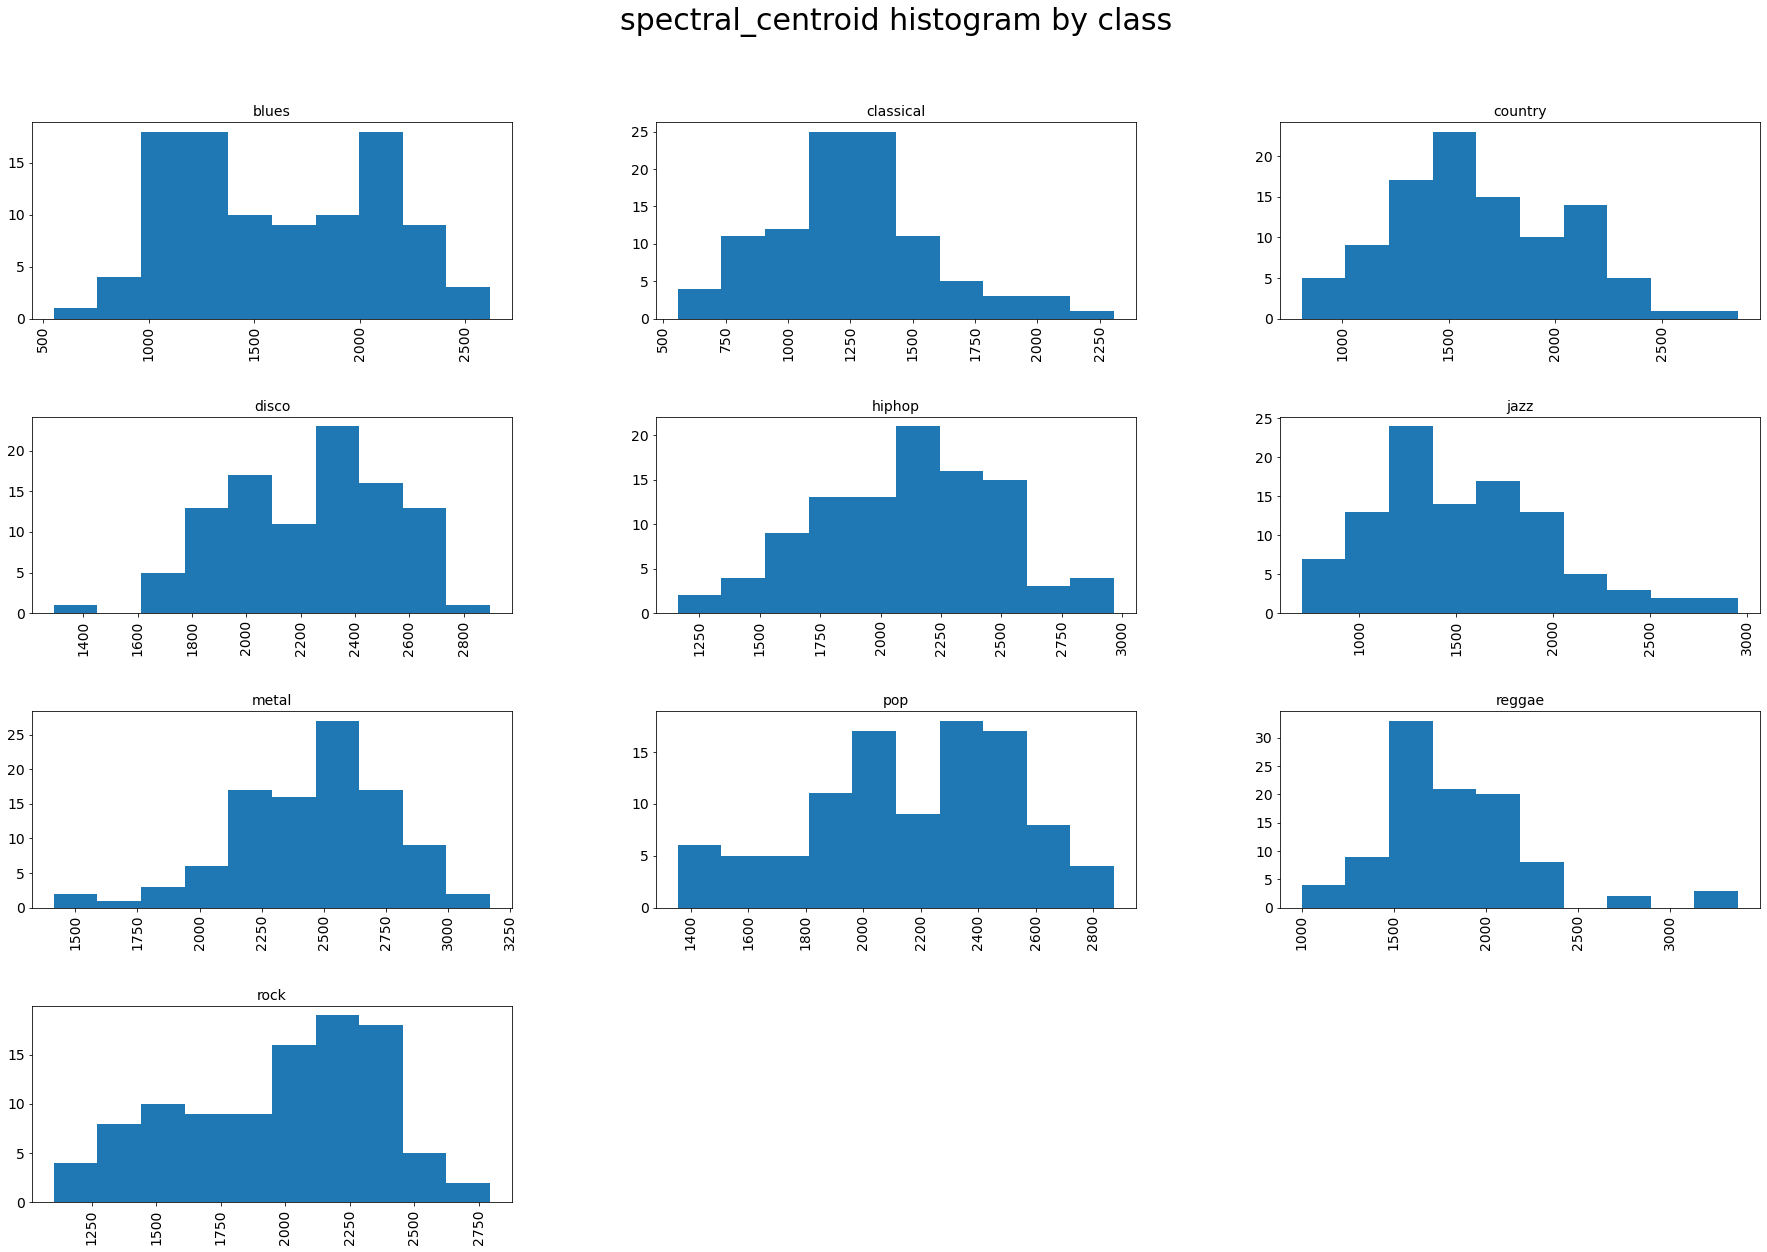

In [17]:
fig, ax = plt.subplots(figsize=(30,20))

df["spectral_centroid"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("spectral_centroid histogram by class", fontsize=30)
plt.show()

#### Boxplot

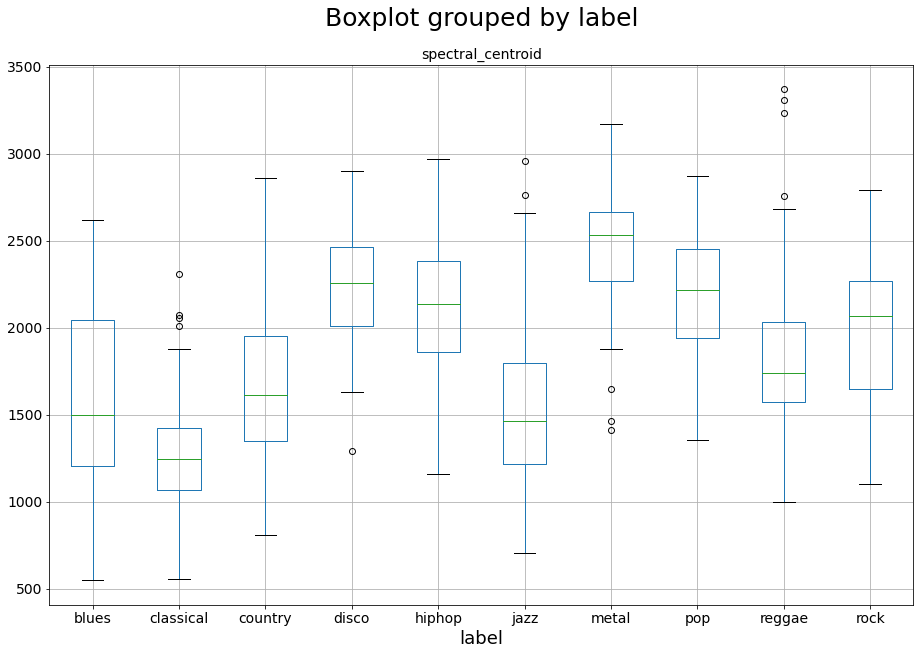

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("spectral_centroid boxplot by class", fontsize=30)

df.boxplot(column=["spectral_centroid"], by='label', ax=ax)

### chroma_stft

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


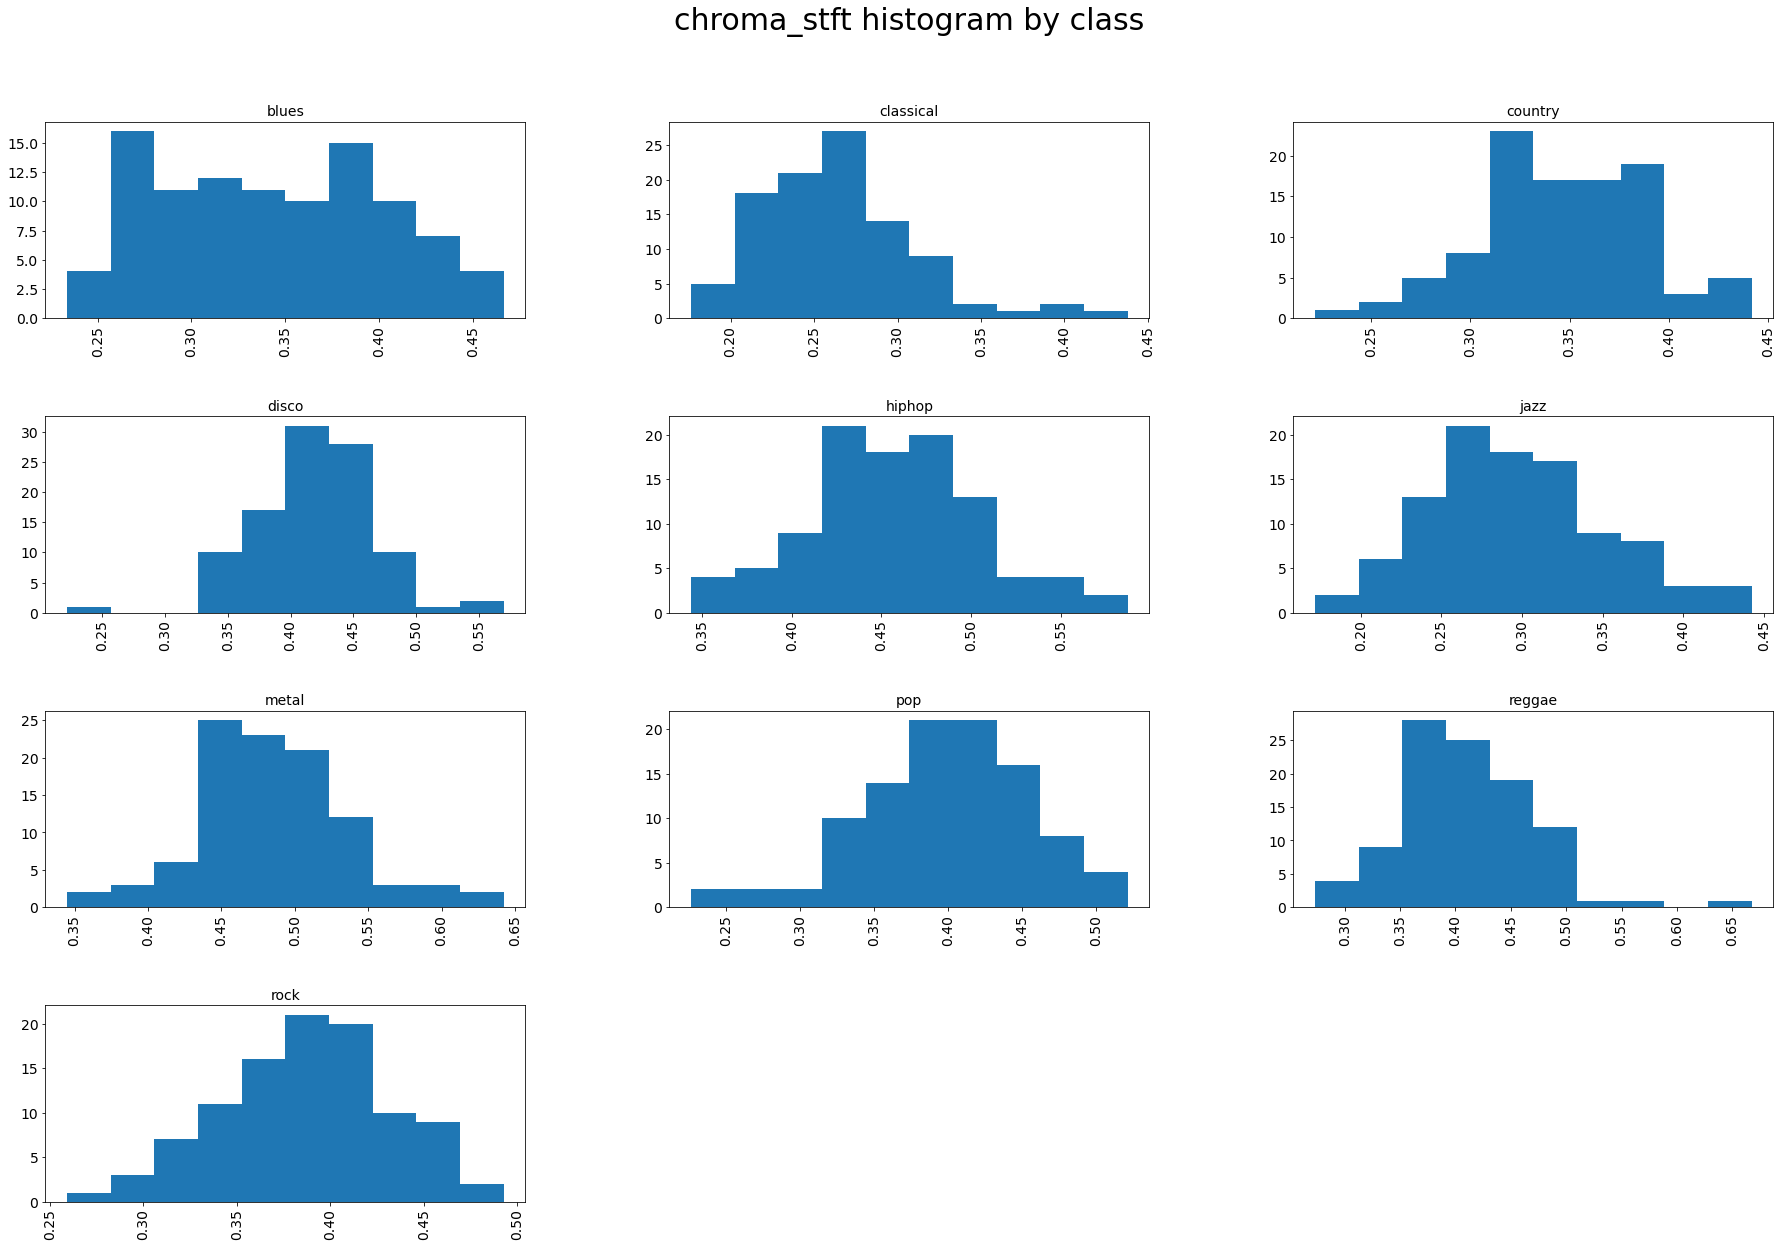

In [35]:
fig, ax = plt.subplots(figsize=(30,20))

df["chroma_stft"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("chroma_stft histogram by class", fontsize=30)
plt.show()

#### Boxplot

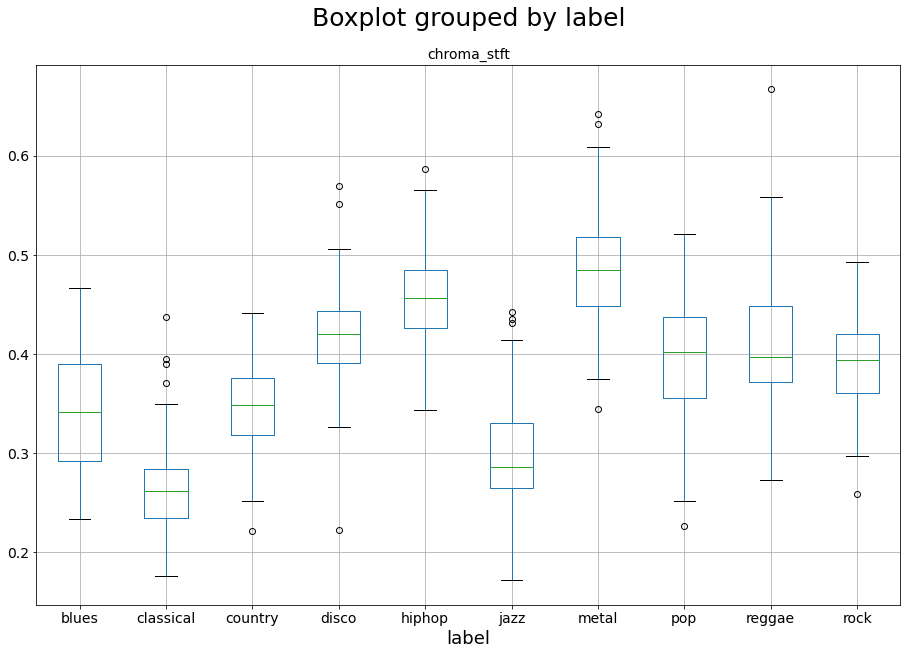

In [36]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("chroma_stft boxplot by class", fontsize=30)

df.boxplot(column=["chroma_stft"], by='label', ax=ax)

### rmse

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


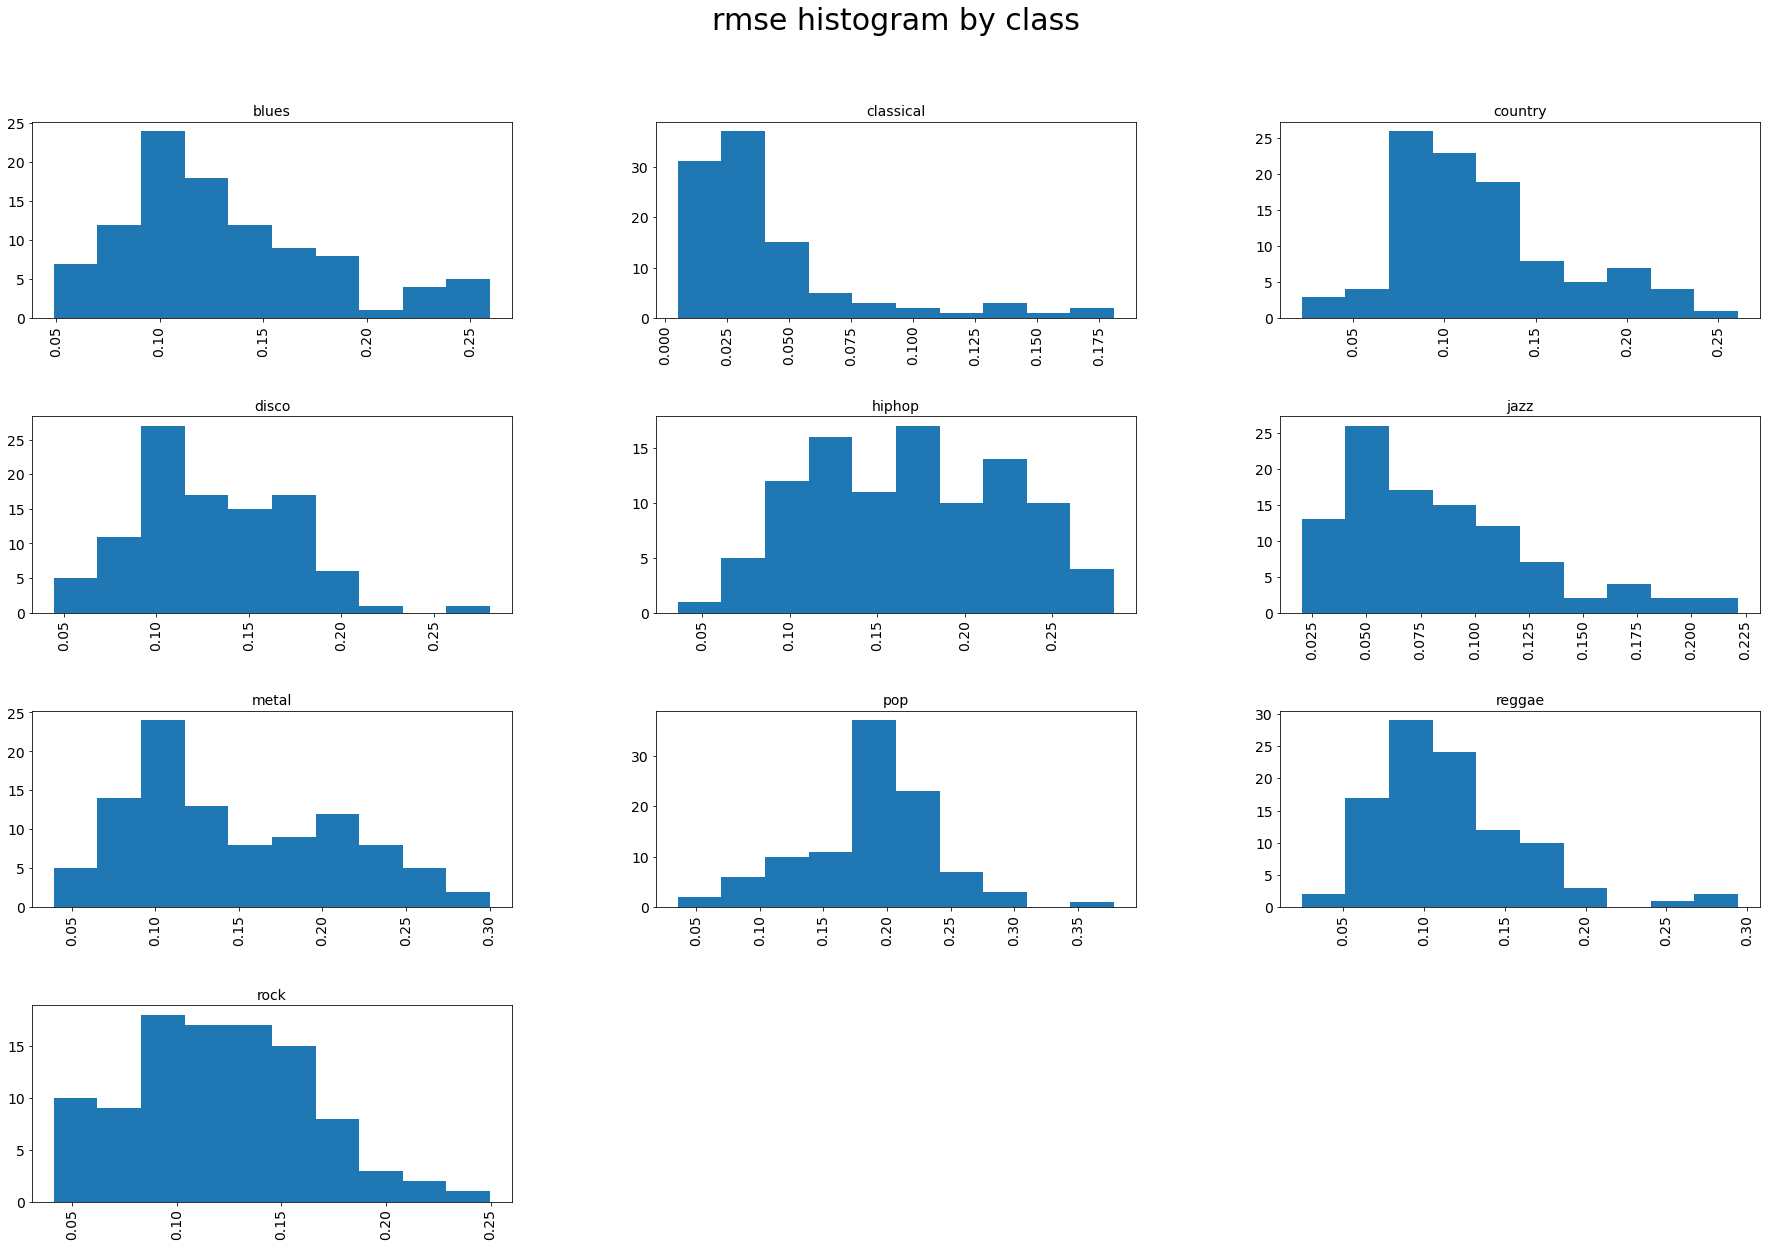

In [37]:
fig, ax = plt.subplots(figsize=(30,20))

df["rmse"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("rmse histogram by class", fontsize=30)
plt.show()

#### Boxplot

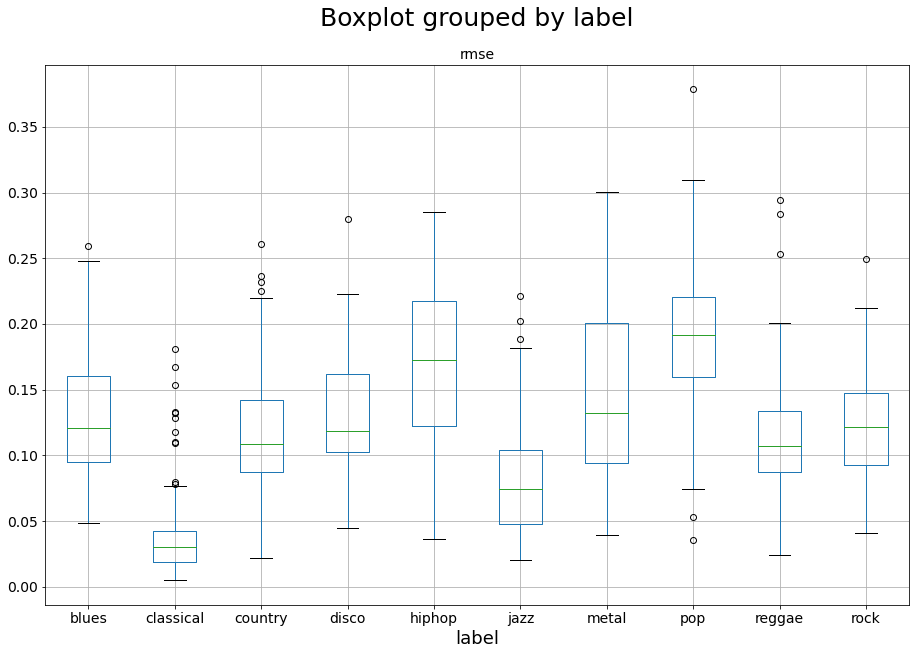

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("rmse boxplot by class", fontsize=30)

df.boxplot(column=["rmse"], by='label', ax=ax)

### spectral_bandwidth

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


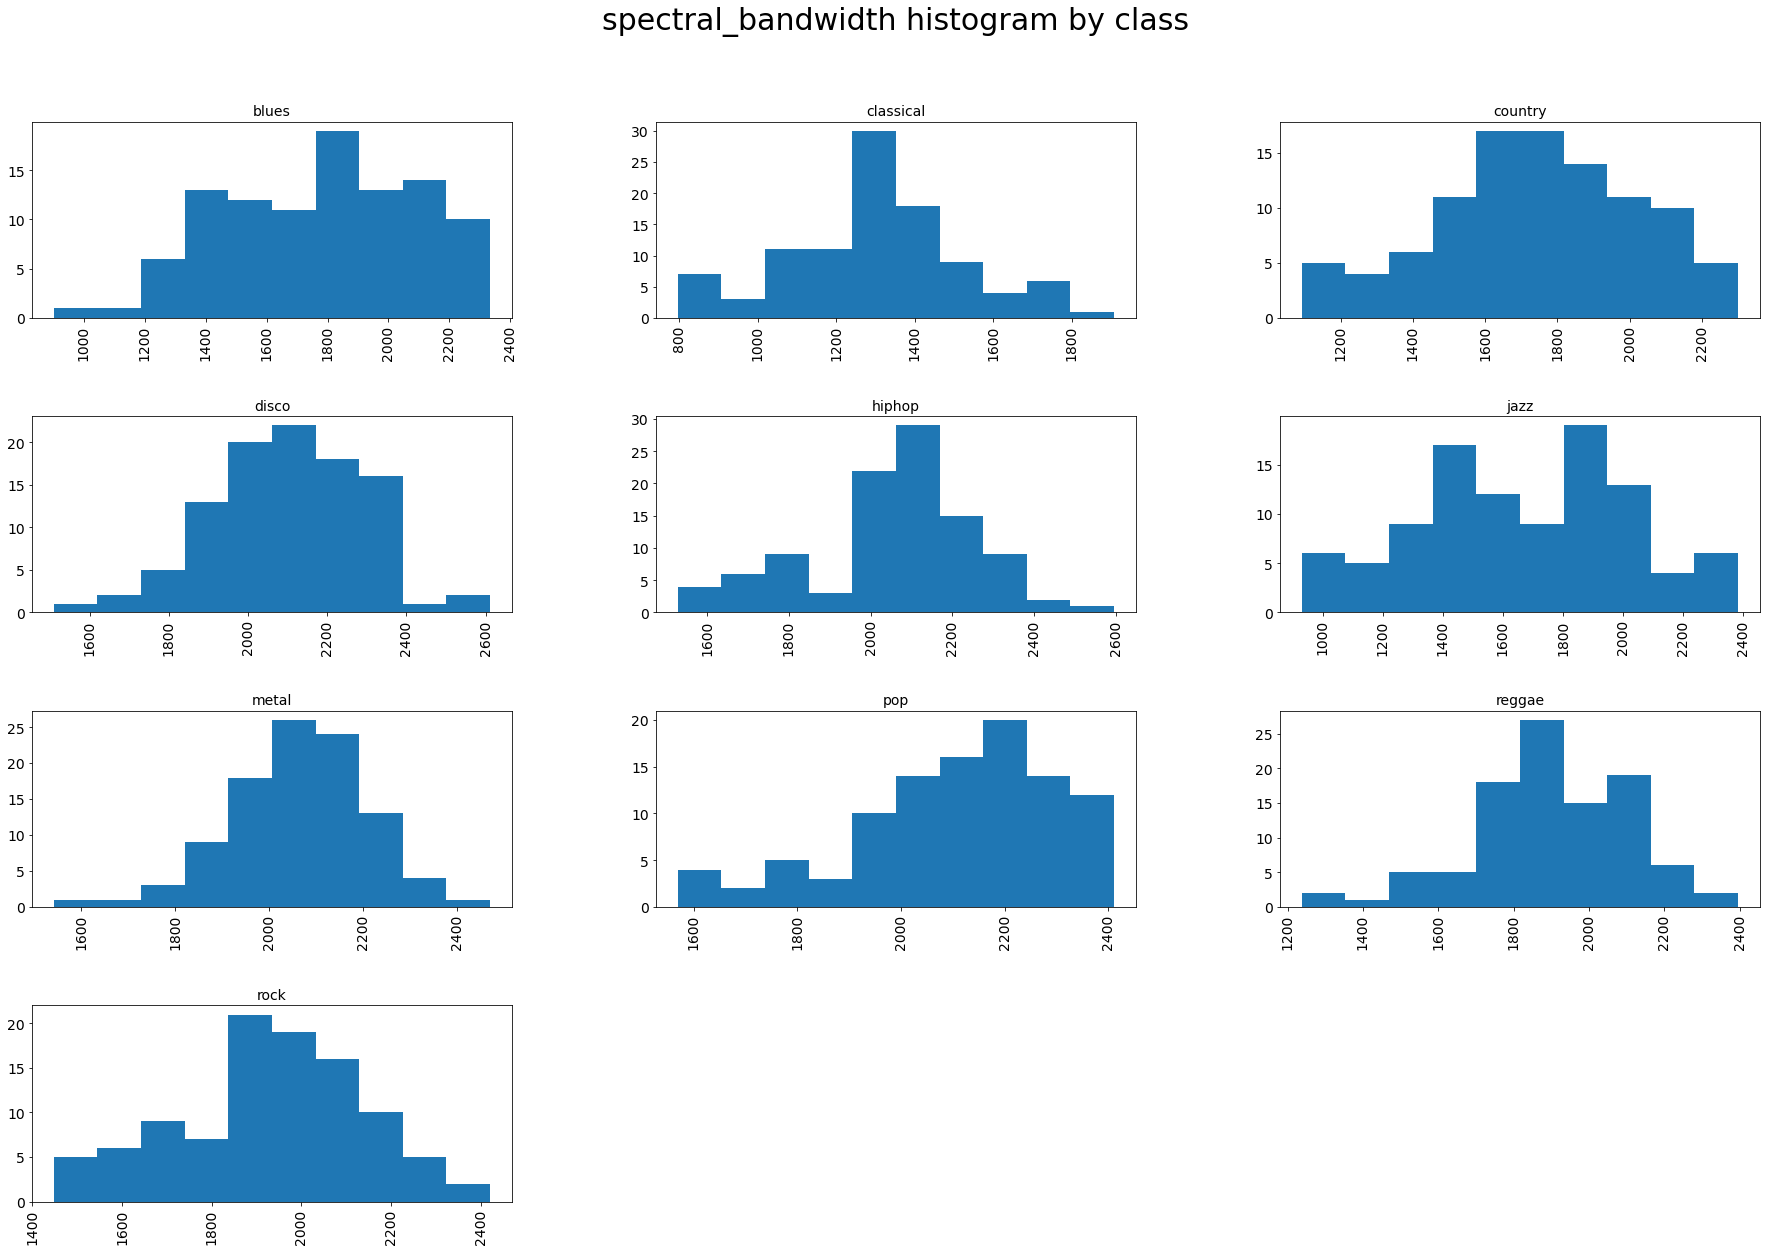

In [39]:
fig, ax = plt.subplots(figsize=(30,20))

df["spectral_bandwidth"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("spectral_bandwidth histogram by class", fontsize=30)
plt.show()

#### Boxplot

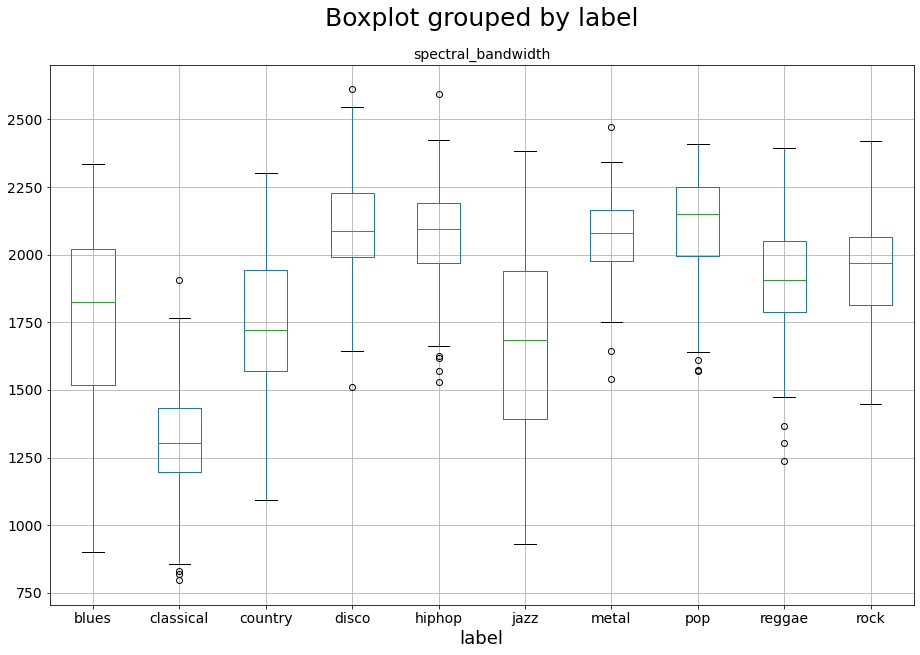

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("spectral_bandwidth boxplot by class", fontsize=30)

df.boxplot(column=["spectral_bandwidth"], by='label', ax=ax)

### rolloff

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


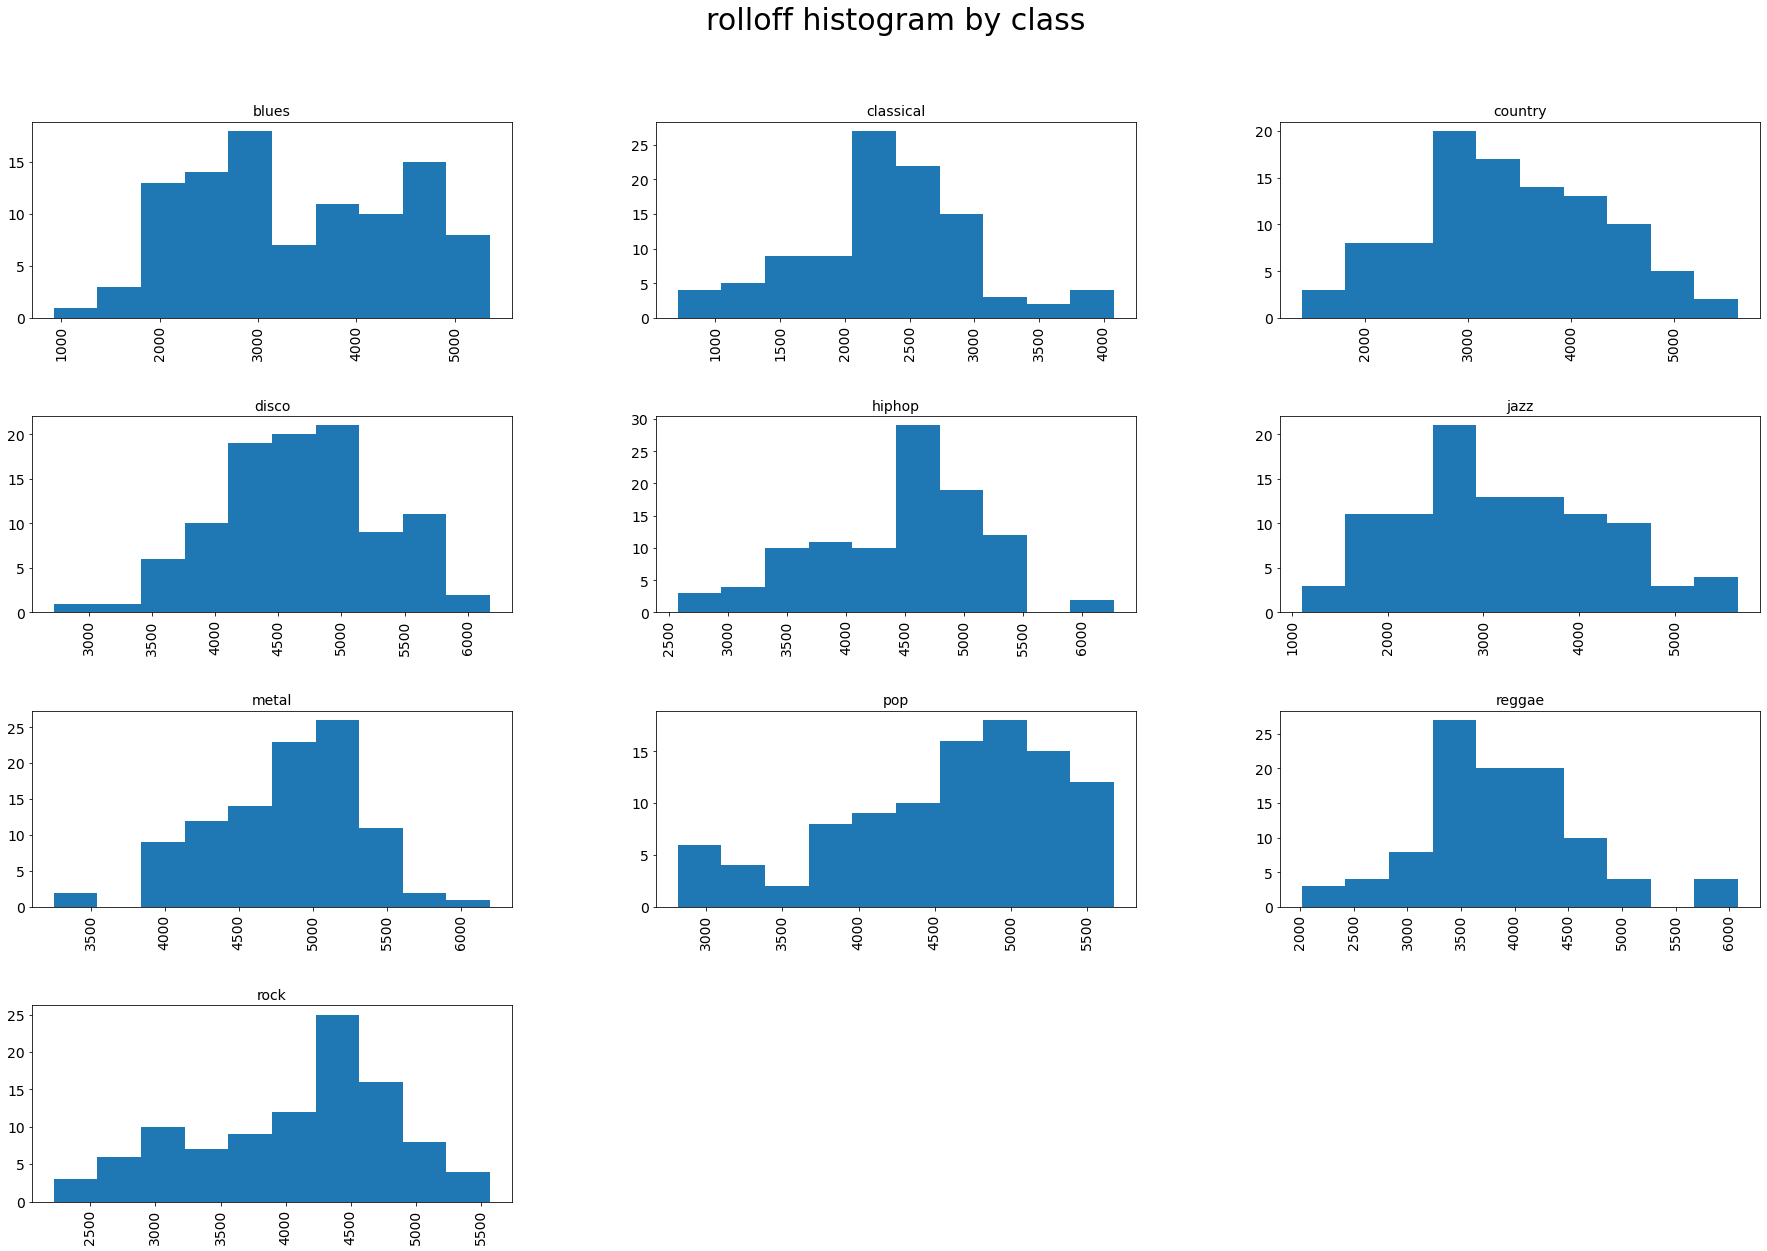

In [41]:
fig, ax = plt.subplots(figsize=(30,20))

df["rolloff"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("rolloff histogram by class", fontsize=30)
plt.show()

#### Boxplot

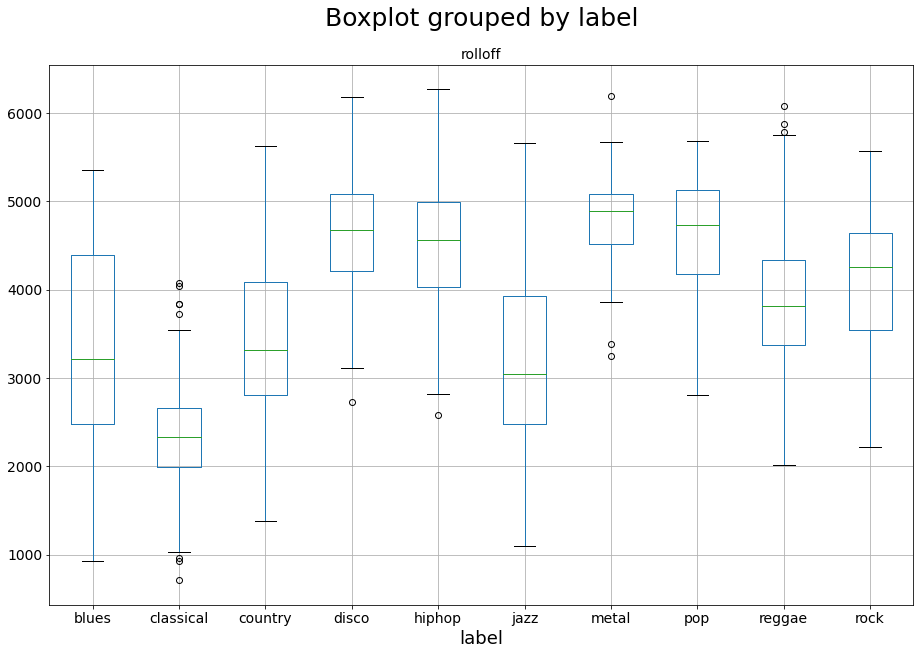

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("rolloff boxplot by class", fontsize=30)

df.boxplot(column=["rolloff"], by='label', ax=ax)

### zero_crossing_rate

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


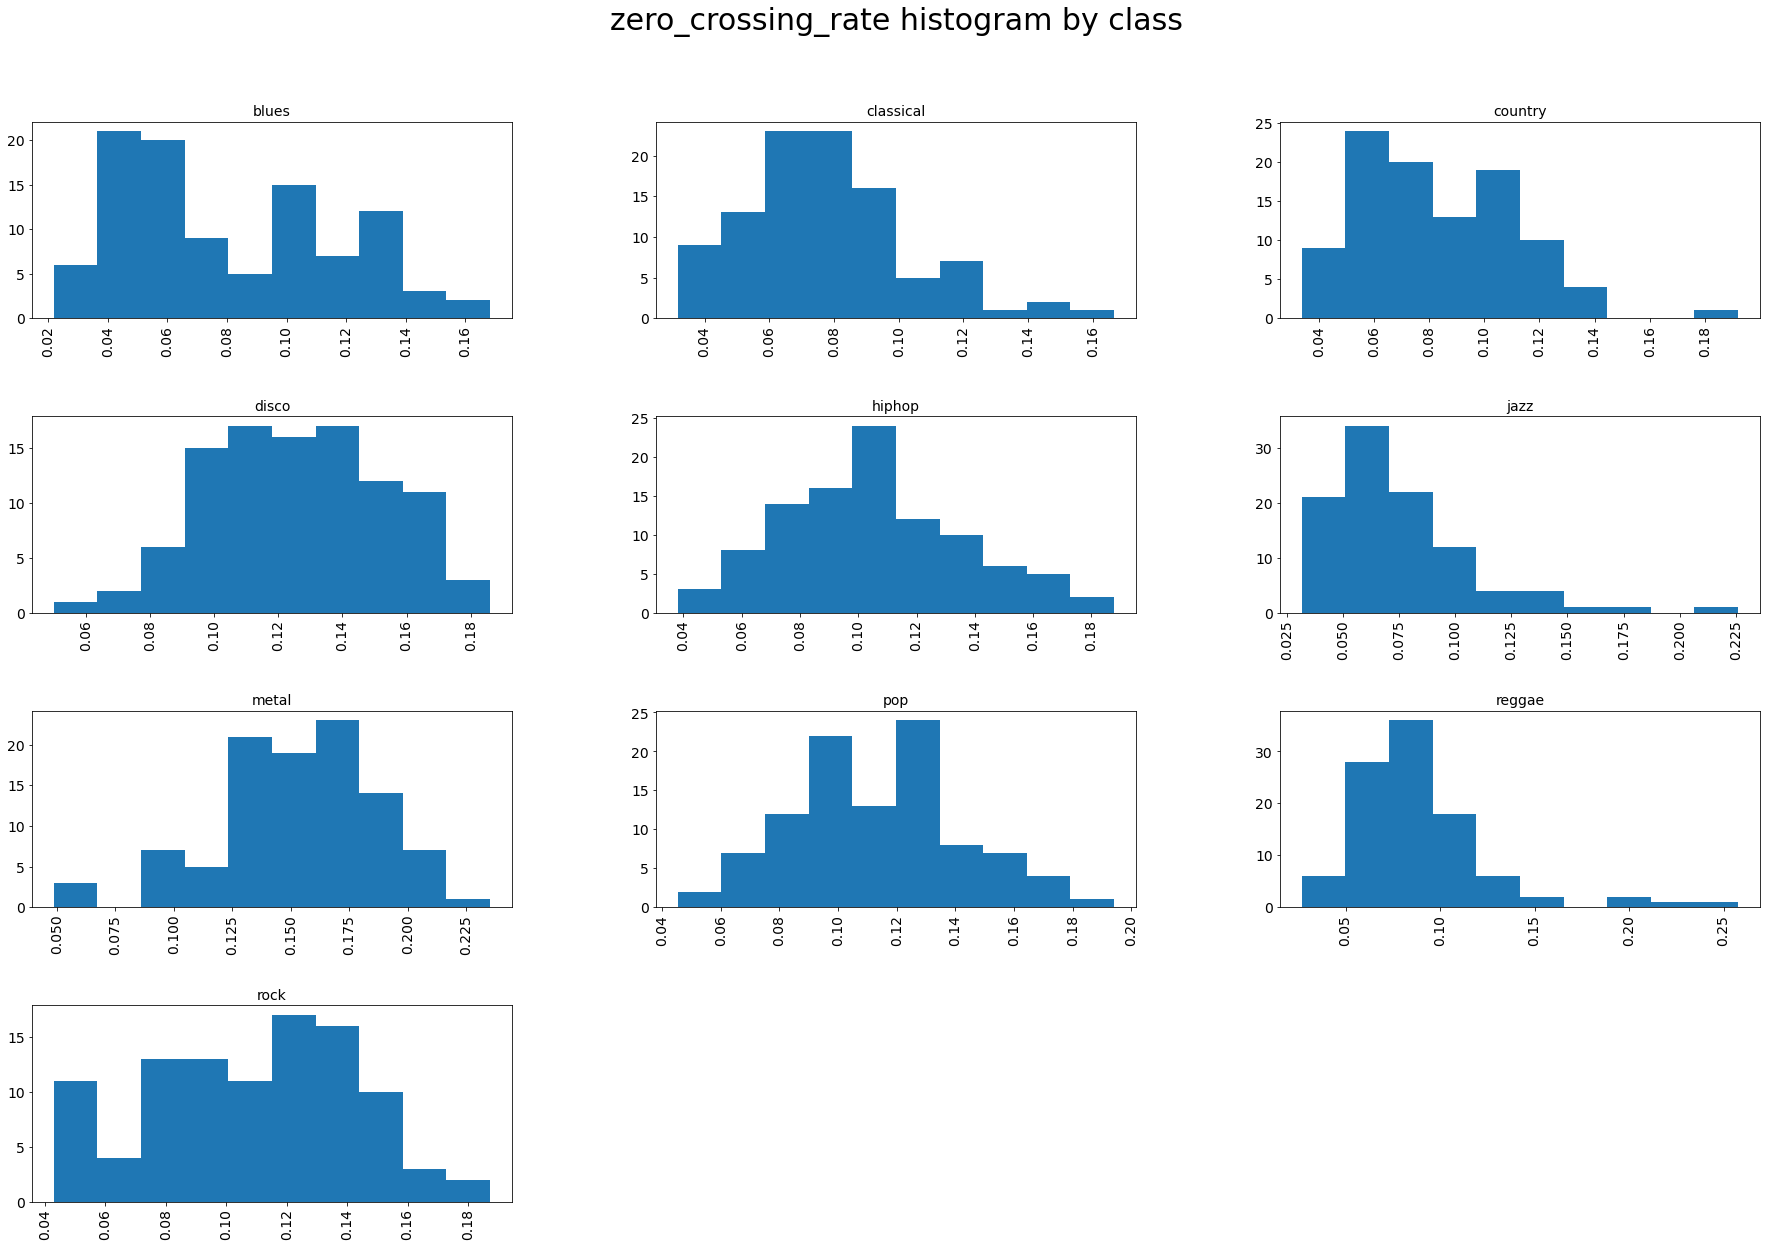

In [43]:
fig, ax = plt.subplots(figsize=(30,20))

df["zero_crossing_rate"].hist(by=df['label'], figsize=(20,12), ax=ax)

fig.suptitle("zero_crossing_rate histogram by class", fontsize=30)
plt.show()

#### Boxplot

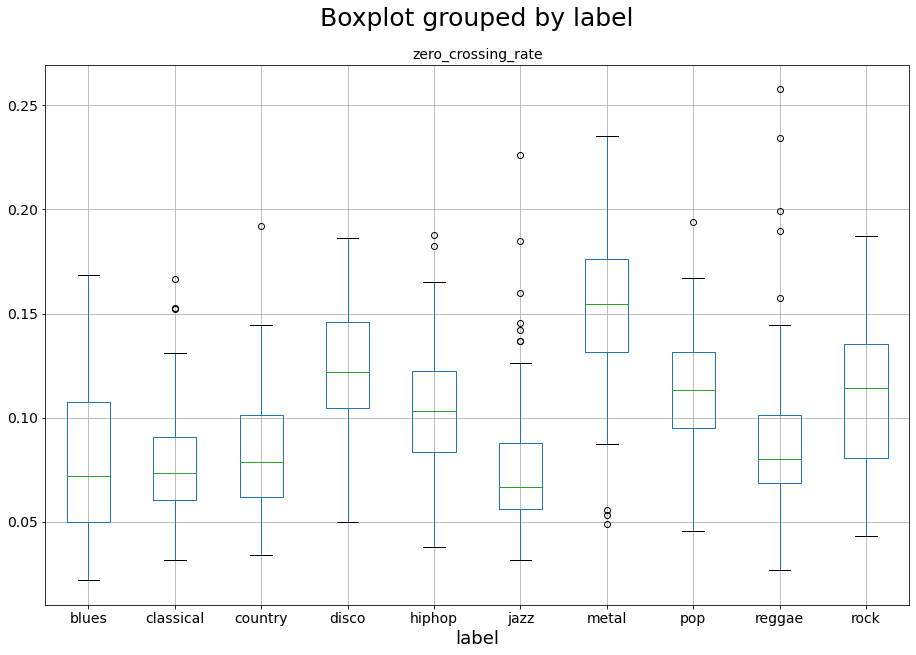

In [45]:
fig, ax = plt.subplots(figsize=(15,10))

plt.suptitle("zero_crossing_rate boxplot by class", fontsize=30)

df.boxplot(column=["zero_crossing_rate"], by='label', ax=ax)